# Métodos de Runge-Kutta
__Rosas Avila José Daniel__



Aproximar la solución del problema :
$$
\frac{dy}{dt} = y-t^2+1 \quad en \quad 0\leq t\leq 4 \\
y(0) = 0.5
$$

para $h_t = 1,0.5,0.25,0.125 (N_t= 4, 8, 16 ,32)$ 

Notas: Para todos los casos usar
* Método de Euler
* Método Runge-Kutta orden 2
* Método Runge-Kutta orden 3
* Método Runge-Kutta orden 4

Hint: Solucion exacta $y(t) = (t+1)^2-0.5e^t$


1. Graficar la solución exacta y compararla con las soluciones numericas obtenidas
2. Graficar el error y explicar el comprtamiento de cada método



In [70]:
import numpy as np
import matplotlib.pyplot as plt
# import time

In [4]:
def mesh (a, b, Nt ):
    ht = (b-a) / Nt
    return ht

def f(t,y):
    return y - t **2 + 1

def Exacta (t):
    return (t +1)**2 - 0.5 * np. exp (t)

def Euler (f, t, w, ht ):
    for i, val in enumerate (w [0: -1]):
        w[i +1] = w[i] + ht * f(t[i], w[i])
        t[i +1] = t [0] + (i +1) * ht

def RK2 (f, t, w, ht ):
    for i, val in enumerate (w [0: -1]):
        k1 = ht * f(t[i], w[i])
        w[i +1] = w[i] +ht * f(t[i] + ht * 0.5 ,w[i] + k1 * 0.5)
        t[i +1] = a + (i +1) * ht
        
        
def RK3 (f, t, w, ht ):
    for i, val in enumerate (w [0: -1]):
        k1 = ht * f(t[i], w[i])
        k2 = ht * f(t[i] + ht /3,w[i] + k1 / 3)
        k3 = ht * f(t[i] + 2 * ht / 3, w[i] + 2 * k2 / 3)
        w[i +1] = w[i] + (k1 + 3 * k3) / 4
        t[i +1] = a + (i +1) * ht

def RK4 (f, t, w, ht ):
    for i, val in enumerate (w [0: -1]):
        k1 = ht * f(t[i], w[i])
        k2 = ht * f(t[i] + ht /2, w[i] + k1 / 2)
        k3 = ht * f(t[i] + ht /2, w[i] + k2 / 2)
        k4 = ht * f(t[i] + ht , w[i] + k3)
        w[i +1] = w[i] + (k1 + 2* k2 +2* k3 + k4) / 6
        t[i +1] = a + (i +1) * ht

In [81]:
def compare_methods(Nt,ht):
    
    t2=np. linspace (a, b, 100)
    t = np. linspace (a, b, Nt +1)
    y_eul = np. zeros (Nt +1);
    y_rk2 = np. zeros (Nt +1)
    y_rk3 = np. zeros (Nt +1)
    y_rk4 = np. zeros (Nt +1)

    y_eul [0]= y0
    y_rk2 [0]= y0
    y_rk3 [0]= y0
    y_rk4 [0]= y0
    
#     TEI=time.time()
#     Euler (f, t, y_eul , ht)
#     TEF = (time.time() - TEI)
#     TRK2I=time.time()
#     RK2 (f, t, y_rk2 , ht)
#     TRK2F = (time.time() - TRK2I)
#     TRK3I=time.time()
#     RK3 (f, t, y_rk3 , ht)
#     TRK3F = (time.time() - TRK3I)
#     TRK4I=time.time()
#     RK4 (f, t, y_rk4 , ht)
#     TRK4F = (time.time() - TRK4I)
    
#     print('Tiempos de ejecucion \n')
#     print('Euler = ',TEF)
#     print('RK2 = ',TRK2F)
#     print('RK3 = ',TRK3F)
#     print('RK4 = ',TRK4F)

    yp = Exacta (t)
    yp2 = Exacta(t2)
    e_eul = np. abs (yp - y_eul )
    e_rk2 = np. abs (yp - y_rk2 )
    e_rk3 = np. abs (yp - y_rk3 )
    e_rk4 = np. abs (yp - y_rk4 )
    n_error_eul = np. linalg . norm (e_eul , 2)
    n_error_rk2 = np. linalg . norm (e_rk2 , 2)
    n_error_rk3 = np. linalg . norm (e_rk3 , 2)
    n_error_rk4 = np. linalg . norm (e_rk4 , 2)
    fig,ax=plt.subplots(1,2,figsize=(15,8))
    ax[0].set_title('Solucion y aproximacion con Nt = {} \n \
                    Errores: Eul = {:4.4f}, RK2 = {:4.4f}, RK3 = {:4.4f}, RK4 =  {:4.4f}'\
                    .format(Nt,n_error_eul,n_error_rk2,n_error_rk3,n_error_rk4))
    ax[1].set_title('Errores $N_t$ = {}\n \
                    Errores: Eul = {:4.4f}, RK2 = {:4.4f}, RK3 = {:4.4f}, RK4 =  {:4.4f}'\
                    .format(Nt,n_error_eul,n_error_rk2,n_error_rk3,n_error_rk4));

    ax[0].plot(t2,yp2,'gray' ,linewidth=3,label = 'Solucion exacta')
    ax[0].plot(t,y_eul,'v--',label='Euler')
    ax[0].plot(t,y_rk2,'--^',label='RK2')
    ax[0].plot(t,y_rk3,'--o',label='RK3')
    ax[0].plot(t,y_rk4,'--s',label='RK4')
    ax[0].set_xlabel('t')
    ax[0].set_ylabel('$y(t)$')

    ax[0].legend()

    ax[1].plot(e_eul[1:],'o-',label='Euler')
    ax[1].plot(e_rk2[1:],'o-',label='RK2')
    ax[1].plot(e_rk3[1:],'o-',label='RK3')
    ax[1].plot(e_rk4[1:],'o-',label='RK4')
    ax[1].set_xlabel('n')
    ax[1].set_ylabel('Error')

    ax[1].legend()
    ax[1].semilogy()

Tiempos de ejecucion 

Euler =  0.0
RK2 =  0.0010008811950683594
RK3 =  0.0
RK4 =  0.0


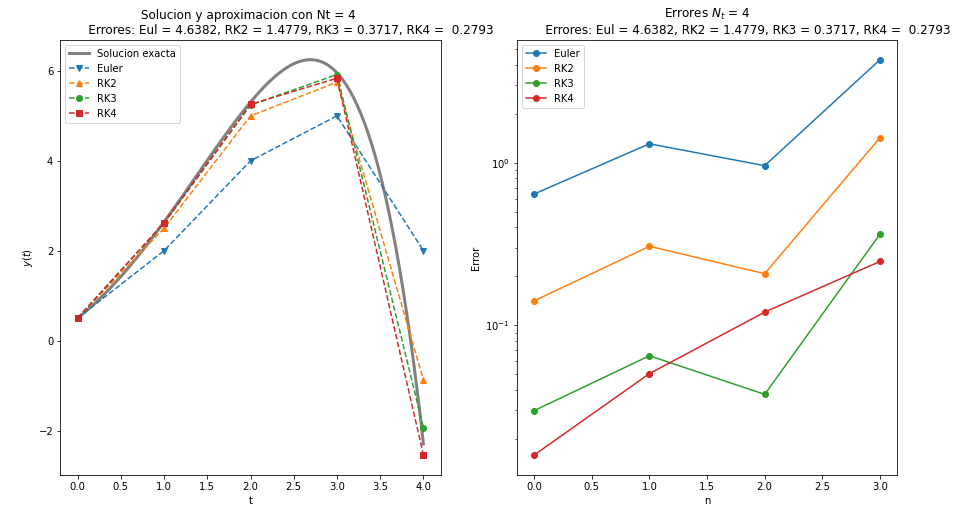

In [72]:
Nt = 4 # 4, 8, 16, 32
a = 0
b = 4
ht = mesh (a, b, Nt)
y0 = 0.5
compare_methods(Nt,ht)

Tiempos de ejecucion 

Euler =  0.0
RK2 =  0.0
RK3 =  0.0
RK4 =  0.0


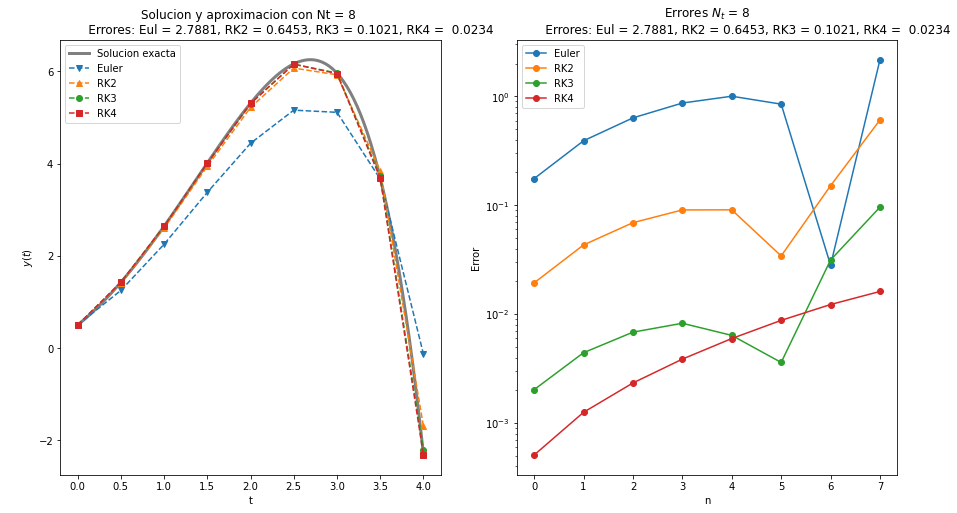

In [73]:
Nt = 8 # 4, 8, 16, 32
a = 0
b = 4
ht = mesh (a, b, Nt)
y0 = 0.5
compare_methods(Nt,ht)

Tiempos de ejecucion 

Euler =  0.0
RK2 =  0.0
RK3 =  0.0
RK4 =  0.0


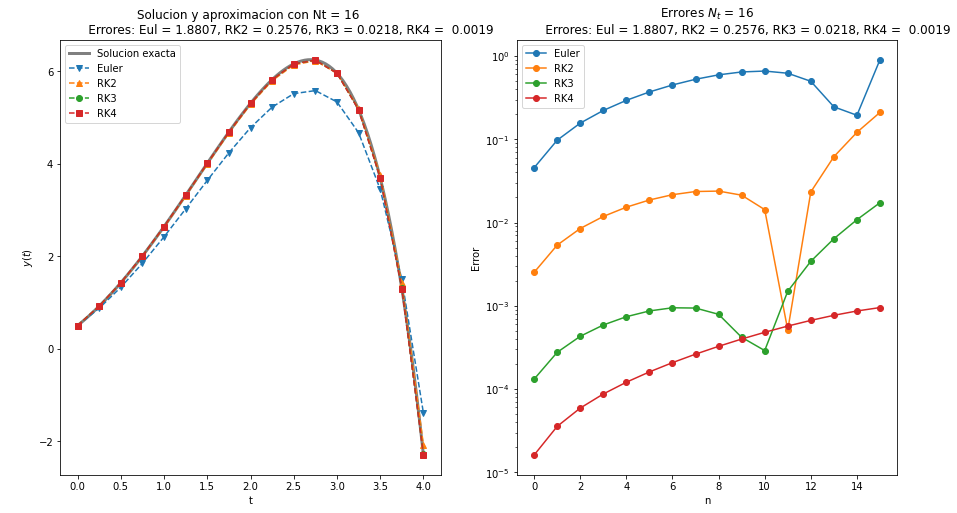

In [74]:
Nt = 16 # 4, 8, 16, 32
a = 0
b = 4
ht = mesh (a, b, Nt)
y0 = 0.5
compare_methods(Nt,ht)

Tiempos de ejecucion 

Euler =  0.0
RK2 =  0.0009996891021728516
RK3 =  0.0
RK4 =  0.0


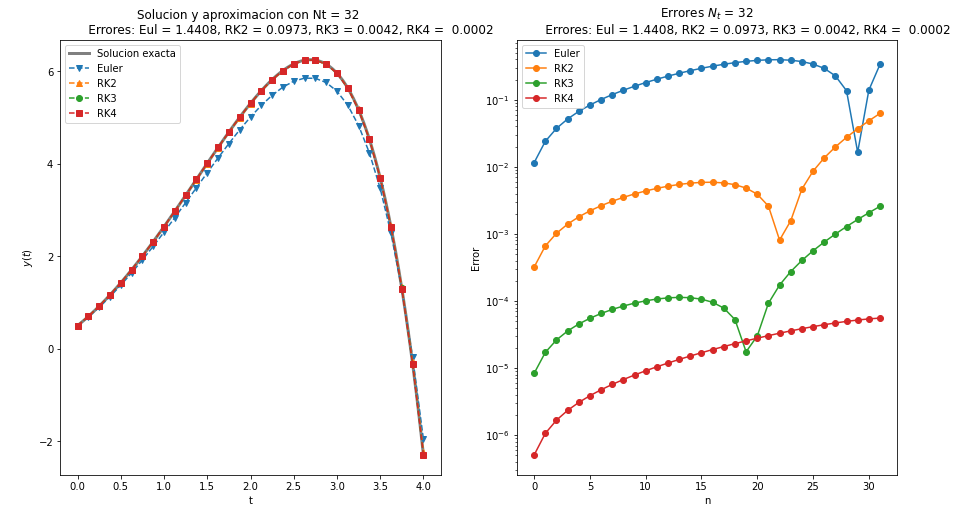

In [75]:
Nt = 32 # 4, 8, 16, 32
a = 0
b = 4
ht = mesh (a, b, Nt)
y0 = 0.5
compare_methods(Nt,ht)

# Discusion

Se observa que para todos los casos el método de Runge-Kutta es mucho mejor que el de Euler y parece que no existe una diferencia en el tiempo de cómputo por lo cual es un método mucho mejor y más preciso que el de Euler.+
De entre los ordenes de aproximación de Range-Kutta el de 4to orden pareciese mejor dado que su curva de error se comporta casi como una recta, mientras que los otros ,incluyendo el de Euler, se observa que hay saltos en la frontera.